# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
new_cities = []
lat        = []
lng        = []
max_temp   = []
humidity   = []
cloudiness = []
wind_speed = []
country    = []
date       = []

In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

print("Beginning Data Retrieval")
print("-----------------------------")

# Loop to call the weather api using a list of cities
for count, city_name in enumerate(cities, start=1):
    query_params = f"q={city_name}&appid={weather_api_key}&units=imperial"
    response = requests.get(base_url + query_params).json()
    
    if (response["cod"]=="404"):
        print("City not found. Skipping...")
    else    :
        new_cities.append(city_name)
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])

    print(f"Processing Record {count} of Set 1 | {city_name}")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | kaitangata
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | hermanus
City not found. Skipping...
Processing Record 5 of Set 1 | tumannyy
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | caravelas
Processing Record 8 of Set 1 | victoria
City not found. Skipping...
Processing Record 9 of Set 1 | saleaula
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | khandyga
Processing Record 12 of Set 1 | barrow
City not found. Skipping...
Processing Record 13 of Set 1 | barentsburg
Processing Record 14 of Set 1 | bunia
Processing Record 15 of Set 1 | longyearbyen
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | kitimat
Processing Record 18 of Set 1 | winneba
Processing Record 19 of Set 1 | banda aceh
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | punta arenas
Proce

Processing Record 189 of Set 1 | codrington
Processing Record 190 of Set 1 | olafsvik
Processing Record 191 of Set 1 | upernavik
Processing Record 192 of Set 1 | krasnoselkup
Processing Record 193 of Set 1 | vysokogornyy
Processing Record 194 of Set 1 | havre-saint-pierre
Processing Record 195 of Set 1 | coihaique
Processing Record 196 of Set 1 | mirpur sakro
Processing Record 197 of Set 1 | kavieng
Processing Record 198 of Set 1 | barinas
City not found. Skipping...
Processing Record 199 of Set 1 | tsihombe
Processing Record 200 of Set 1 | provideniya
City not found. Skipping...
Processing Record 201 of Set 1 | karamea
City not found. Skipping...
Processing Record 202 of Set 1 | bur gabo
Processing Record 203 of Set 1 | huarmey
Processing Record 204 of Set 1 | mayo
Processing Record 205 of Set 1 | miri
Processing Record 206 of Set 1 | ravar
Processing Record 207 of Set 1 | sitka
Processing Record 208 of Set 1 | lorengau
Processing Record 209 of Set 1 | srednekolymsk
Processing Record 

Processing Record 376 of Set 1 | colares
Processing Record 377 of Set 1 | impfondo
Processing Record 378 of Set 1 | tura
Processing Record 379 of Set 1 | te anau
Processing Record 380 of Set 1 | serenje
Processing Record 381 of Set 1 | la rioja
Processing Record 382 of Set 1 | necochea
Processing Record 383 of Set 1 | palembang
Processing Record 384 of Set 1 | athabasca
Processing Record 385 of Set 1 | bandarbeyla
Processing Record 386 of Set 1 | berberati
Processing Record 387 of Set 1 | kiama
Processing Record 388 of Set 1 | grand gaube
Processing Record 389 of Set 1 | tahta
Processing Record 390 of Set 1 | ancud
Processing Record 391 of Set 1 | acarau
City not found. Skipping...
Processing Record 392 of Set 1 | formoso do araguaia
City not found. Skipping...
Processing Record 393 of Set 1 | umm durman
Processing Record 394 of Set 1 | kununurra
Processing Record 395 of Set 1 | pevek
City not found. Skipping...
Processing Record 396 of Set 1 | grand river south east
Processing Record 

Processing Record 558 of Set 1 | epe
Processing Record 559 of Set 1 | catamarca
Processing Record 560 of Set 1 | ampanihy
City not found. Skipping...
Processing Record 561 of Set 1 | jiddah
Processing Record 562 of Set 1 | whyalla
Processing Record 563 of Set 1 | paracatu
City not found. Skipping...
Processing Record 564 of Set 1 | mutsamudu
Processing Record 565 of Set 1 | ambilobe
Processing Record 566 of Set 1 | abu dhabi
Processing Record 567 of Set 1 | kerema
Processing Record 568 of Set 1 | ilo
Processing Record 569 of Set 1 | le port
City not found. Skipping...
Processing Record 570 of Set 1 | satitoa
Processing Record 571 of Set 1 | saint-paul
Processing Record 572 of Set 1 | natitingou
Processing Record 573 of Set 1 | fare
Processing Record 574 of Set 1 | gibgos
Processing Record 575 of Set 1 | poum
Processing Record 576 of Set 1 | altay
Processing Record 577 of Set 1 | barra do garcas
City not found. Skipping...
Processing Record 578 of Set 1 | vaitupu
Processing Record 579 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_dict = {
    "City" : new_cities,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}

city_dict

city_data = pd.DataFrame(city_dict)


In [6]:
len(city_data)

553

In [7]:
# Export the city data into a .csv
city_data.to_csv(output_data_file)

In [8]:
# Diplay the DataFrame
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kaitangata,-46.2817,169.8464,55.00,76,100,13.00,NZ,1619728647
1,rikitea,-23.1203,-134.9692,76.48,68,99,10.13,PF,1619728648
2,hilo,19.7297,-155.0900,80.60,57,20,3.44,US,1619728381
3,hermanus,-34.4187,19.2345,55.99,74,80,3.00,ZA,1619728648
4,ushuaia,-54.8000,-68.3000,42.80,56,20,5.75,AR,1619728650


In [9]:
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,21.524214,15.813203,61.858517,68.972875,54.954792,7.394629,1.619729e+09
std,32.802565,90.788058,18.850362,22.845360,39.267613,4.702585,9.750641e+01
min,-54.800000,-179.166700,-2.130000,1.000000,0.000000,0.450000,1.619728e+09
25%,-5.198900,-64.383100,47.620000,56.000000,14.000000,3.620000,1.619729e+09
50%,28.366700,21.548200,64.720000,74.000000,70.000000,6.310000,1.619729e+09
75%,48.833300,91.399700,77.470000,87.000000,93.000000,9.750000,1.619729e+09
max,78.218600,179.316700,100.710000,100.000000,100.000000,27.630000,1.619729e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
filtered_city_data = city_data.loc[city_data["Humidity"]<=100,:]
len(filtered_city_data)

553

In [11]:
filtered_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,21.524214,15.813203,61.858517,68.972875,54.954792,7.394629,1.619729e+09
std,32.802565,90.788058,18.850362,22.845360,39.267613,4.702585,9.750641e+01
min,-54.800000,-179.166700,-2.130000,1.000000,0.000000,0.450000,1.619728e+09
25%,-5.198900,-64.383100,47.620000,56.000000,14.000000,3.620000,1.619729e+09
50%,28.366700,21.548200,64.720000,74.000000,70.000000,6.310000,1.619729e+09
75%,48.833300,91.399700,77.470000,87.000000,93.000000,9.750000,1.619729e+09
max,78.218600,179.316700,100.710000,100.000000,100.000000,27.630000,1.619729e+09


In [12]:
#  Get the indices of cities that have humidity over 100%.
humidity_over_100 = city_data.loc[city_data["Humidity"]>100,:]
indexes = humidity_over_100.index
indexes

Int64Index([], dtype='int64')

In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data

# With this loop we can always make sure we drop the rows with humidity over 100 dynamically
for i in indexes:
    clean_city_data = city_data.drop(city_data.index[i], inplace = False)

clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kaitangata,-46.2817,169.8464,55.00,76,100,13.00,NZ,1619728647
1,rikitea,-23.1203,-134.9692,76.48,68,99,10.13,PF,1619728648
2,hilo,19.7297,-155.0900,80.60,57,20,3.44,US,1619728381
3,hermanus,-34.4187,19.2345,55.99,74,80,3.00,ZA,1619728648
4,ushuaia,-54.8000,-68.3000,42.80,56,20,5.75,AR,1619728650


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

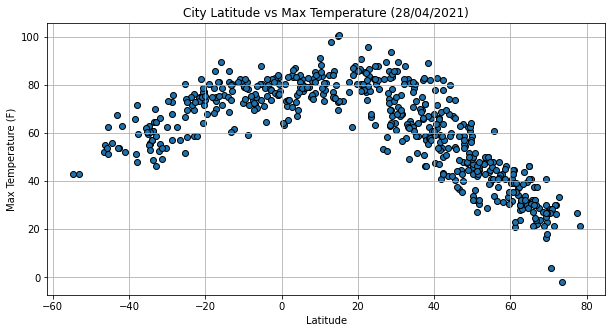

In [14]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Max Temp"]

## Add properties to the plot
plt.figure(figsize=(10,5))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature (28/04/2021)')
plt.grid()

## Create the Scatter plot and linear
plt.scatter(x_values,y_values, marker='o', color='#1d71ac', edgecolors='black')

plt.savefig("Images/lat_vs_max_temp.png", bbox_inches = "tight")
plt.show()

* The scatter plot shows that max temperatures are near the ecuator.
* We can find the lower temperatures to the north hemisphere

## Latitude vs. Humidity Plot

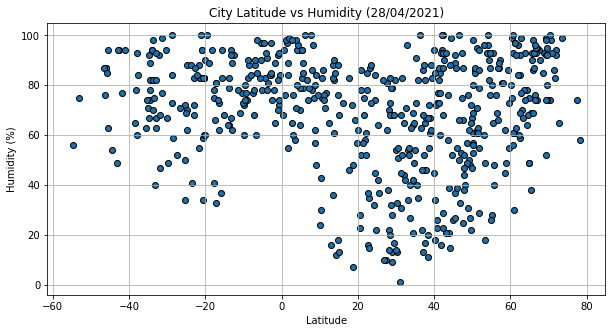

In [15]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Humidity"]

## Add properties to the plot
plt.figure(figsize=(10,5))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (28/04/2021)')
plt.grid()

## Create the Scatter plot and linear
plt.scatter(x_values,y_values, marker='o', color='#1d71ac', edgecolors='black')

plt.savefig("Images/lat_vs_humitidy.png", bbox_inches = "tight")
plt.show()

* The plot doesn't show a clear relation between latitude and humidity.
* The highest values for humidity are present in almost all the latitudes

## Latitude vs. Cloudiness Plot

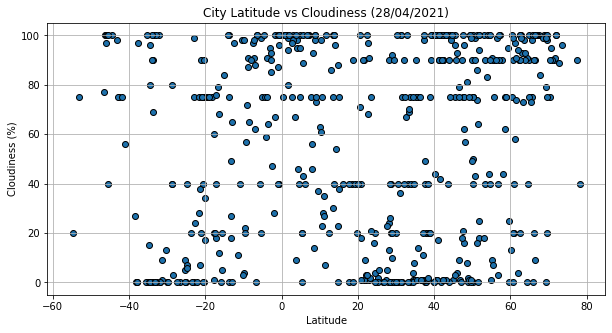

In [17]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Cloudiness"]

## Add properties to the plot
plt.figure(figsize=(10,5))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (28/04/2021)')
plt.grid()

## Create the Scatter plot and linear
plt.scatter(x_values,y_values, marker='o', color='#1d71ac', edgecolors='black')

plt.savefig("Images/lat_vs_cloudiness.png", bbox_inches = "tight")
plt.show()

* This plot also doesn't show a clear relation between Cloudiness and latitude

## Latitude vs. Wind Speed Plot

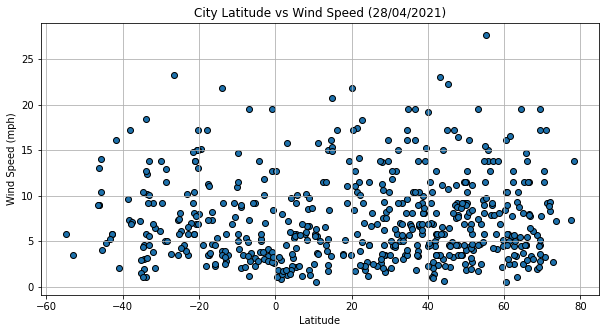

In [18]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Wind Speed"]

## Add properties to the plot
plt.figure(figsize=(10,5))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed (28/04/2021)')
plt.grid()

## Create the Scatter plot and linear
plt.scatter(x_values,y_values, marker='o', color='#1d71ac', edgecolors='black')

plt.savefig("Images/lat_vs_wind_speed.png", bbox_inches = "tight")
plt.show()

* This plot also doesn't show a clear relation between Wind Speed and latitude.
* Near ecuator the plot shows both low and high Wind speeds.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [19]:
north_hemisphere_data = clean_city_data.loc[clean_city_data["Lat"]>=0,:]
south_hemisphere_data = clean_city_data.loc[clean_city_data["Lat"]<0,:]

In [20]:
column = 'Max Temp'

----------------------------------------------------------------------
The correlation between both factors is -0.86
y = -0.89x +93.23
The r-value is: 0.7383952427921905
----------------------------------------------------------------------


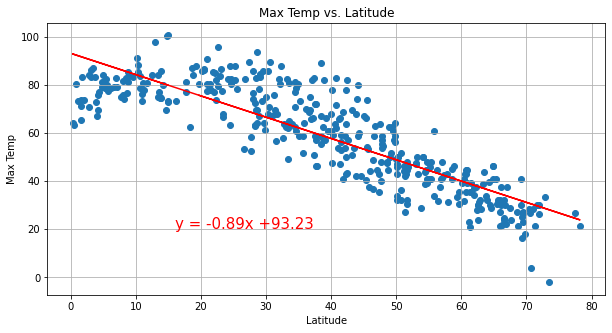

In [21]:
x_values = north_hemisphere_data['Lat']
y_values = north_hemisphere_data[column]

correlation = st.pearsonr(x_values,y_values)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

## Get the line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

## Add properties to the plot
plt.figure(figsize=(10,5))
plt.xlabel('Latitude')
plt.ylabel(column)
plt.title(f"{column} vs. Latitude")
plt.annotate(line_eq,(16,20),fontsize=15,color="red")
plt.grid()

## Create the Scatter plot and linear
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

## Print the calcuations
print("----------------------------------------------------------------------")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(line_eq)
print(f"The r-value is: {rvalue**2}")
print("----------------------------------------------------------------------")

plt.savefig("Images/nh_lat_vs_temp.png", bbox_inches = "tight")

## Show plot
plt.show()

* The plot shows the closer we get to the equator the temperatures increase
* The r-value is greater than .1 wich indicates there is a strong correlation.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

----------------------------------------------------------------------
The correlation between both factors is 0.77
y = 0.62x +82.54
The r-value is: 0.6004254804436255
----------------------------------------------------------------------


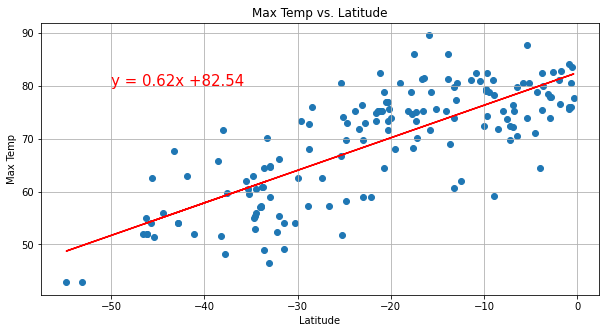

In [23]:
x_values = south_hemisphere_data['Lat']
y_values = south_hemisphere_data['Max Temp']

correlation = st.pearsonr(x_values,y_values)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

## Get the line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

## Add properties to the plot
plt.figure(figsize=(10,5))
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f"{column} vs. Latitude")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.grid()

## Create the Scatter plot and linear
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

## Print the calcuations
print("----------------------------------------------------------------------")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(line_eq)
print(f"The r-value is: {rvalue**2}")
print("----------------------------------------------------------------------")

plt.savefig("Images/sh_lat_vs_temp.png", bbox_inches = "tight")
## Show plot
plt.show()

* The plot shows the closer we get to the equator the temperatures increase
* The r-value is greater than .1 wich indicates there is a strong correlation.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [24]:
column = 'Humidity'

----------------------------------------------------------------------
The correlation between both factors is 0.13
y = 0.16x +59.35
The r-value is: 0.01724790917108747
----------------------------------------------------------------------


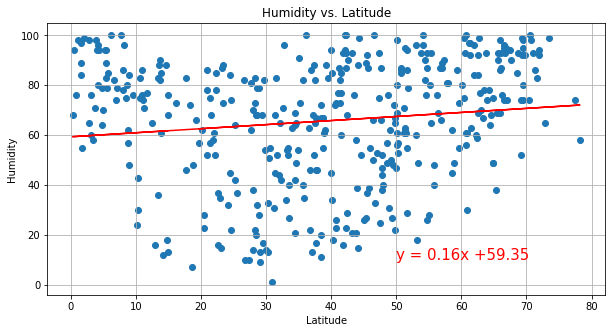

In [25]:
x_values = north_hemisphere_data['Lat']
y_values = north_hemisphere_data[column]

correlation = st.pearsonr(x_values,y_values)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

## Get the line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

## Add properties to the plot
plt.figure(figsize=(10,5))
plt.xlabel('Latitude')
plt.ylabel(column)
plt.title(f"{column} vs. Latitude")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.grid()

## Create the Scatter plot and linear
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

## Print the calcuations
print("----------------------------------------------------------------------")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(line_eq)
print(f"The r-value is: {rvalue**2}")
print("----------------------------------------------------------------------")

plt.savefig("Images/nh_lat_vs_hum.png", bbox_inches = "tight")
## Show plot
plt.show()

* The r-value is lower than .1 wich tell us that there is no a strong correlation between humidity and Latitude

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

----------------------------------------------------------------------
The correlation between both factors is 0.12
y = 0.13x +79.81
The r-value is: 0.013583041234121128
----------------------------------------------------------------------


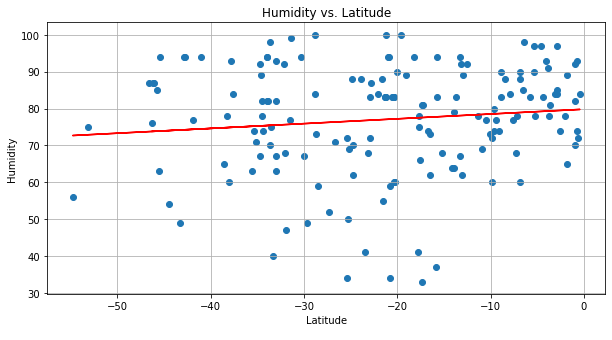

In [26]:
x_values = south_hemisphere_data['Lat']
y_values = south_hemisphere_data[column]

correlation = st.pearsonr(x_values,y_values)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

## Get the line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

## Add properties to the plot
plt.figure(figsize=(10,5))
plt.xlabel('Latitude')
plt.ylabel(column)
plt.title(f"{column} vs. Latitude")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.grid()

## Create the Scatter plot and linear
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

## Print the calcuations
print("----------------------------------------------------------------------")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(line_eq)
print(f"The r-value is: {rvalue**2}")
print("----------------------------------------------------------------------")

plt.savefig("Images/sh_lat_vs_hum.png", bbox_inches = "tight")
## Show plot
plt.show()

* There is no a strong correlation in the other hemisphere, the r-value is lower than .1

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [27]:
column = 'Cloudiness'

----------------------------------------------------------------------
The correlation between both factors is 0.15
y = 0.29x +45.6
The r-value is: 0.02133043659037734
----------------------------------------------------------------------


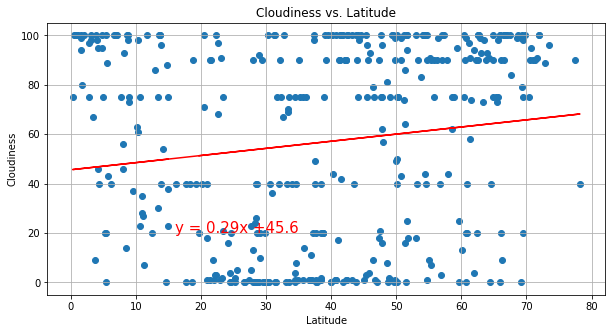

In [28]:
x_values = north_hemisphere_data['Lat']
y_values = north_hemisphere_data[column]

correlation = st.pearsonr(x_values,y_values)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

## Get the line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

## Add properties to the plot
plt.figure(figsize=(10,5))
plt.xlabel('Latitude')
plt.ylabel(column)
plt.title(f"{column} vs. Latitude")
plt.annotate(line_eq,(16,20),fontsize=15,color="red")
plt.grid()

## Create the Scatter plot and linear
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

## Print the calcuations
print("----------------------------------------------------------------------")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(line_eq)
print(f"The r-value is: {rvalue**2}")
print("----------------------------------------------------------------------")

plt.savefig("Images/nh_lat_vs_cloud.png", bbox_inches = "tight")
## Show plot
plt.show()

* The same case for Cloudiness, the r-value is below .1

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

----------------------------------------------------------------------
The correlation between both factors is 0.18
y = 0.52x +61.33
The r-value is: 0.0316864818035618
----------------------------------------------------------------------


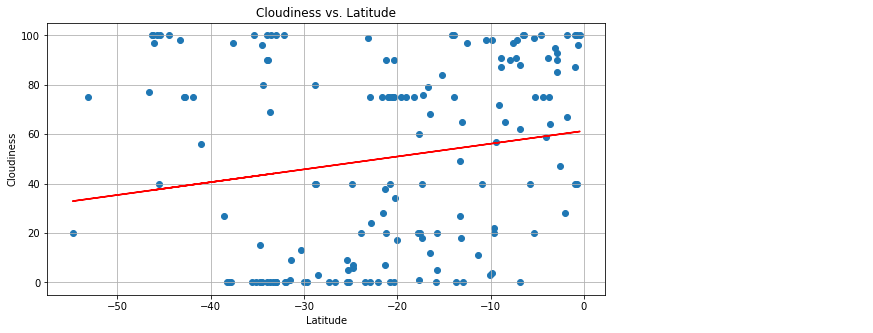

In [29]:
x_values = south_hemisphere_data['Lat']
y_values = south_hemisphere_data[column]

correlation = st.pearsonr(x_values,y_values)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

## Get the line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

## Add properties to the plot
plt.figure(figsize=(10,5))
plt.xlabel('Latitude')
plt.ylabel(column)
plt.title(f"{column} vs. Latitude")
plt.annotate(line_eq,(16,20),fontsize=15,color="red")
plt.grid()

## Create the Scatter plot and linear
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

## Print the calcuations
print("----------------------------------------------------------------------")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(line_eq)
print(f"The r-value is: {rvalue**2}")
print("----------------------------------------------------------------------")

plt.savefig("Images/sh_lat_vs_cloud.png", bbox_inches = "tight")
## Show plot
plt.show()

* The same for the other hemisphere, there is no strong correlation between cloudiness and latitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [30]:
column = 'Wind Speed'

----------------------------------------------------------------------
The correlation between both factors is 0.1
y = 0.02x +6.48
The r-value is: 0.009784079291017569
----------------------------------------------------------------------


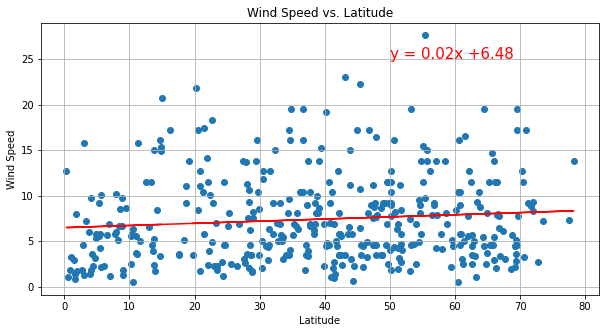

In [31]:
x_values = north_hemisphere_data['Lat']
y_values = north_hemisphere_data[column]

correlation = st.pearsonr(x_values,y_values)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

## Get the line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

## Add properties to the plot
plt.figure(figsize=(10,5))
plt.xlabel('Latitude')
plt.ylabel(column)
plt.title(f"{column} vs. Latitude")
plt.annotate(line_eq,(50,25),fontsize=15,color="red")
plt.grid()

## Create the Scatter plot and linear
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

## Print the calcuations
print("----------------------------------------------------------------------")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(line_eq)
print(f"The r-value is: {rvalue**2}")
print("----------------------------------------------------------------------")

plt.savefig("Images/nh_lat_vs_wind.png", bbox_inches = "tight")
## Show plot
plt.show()

* There is no correlation between Wind speed and latitude

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

----------------------------------------------------------------------
The correlation between both factors is -0.1
y = -0.03x +6.65
The r-value is: 0.009976765058636039
----------------------------------------------------------------------


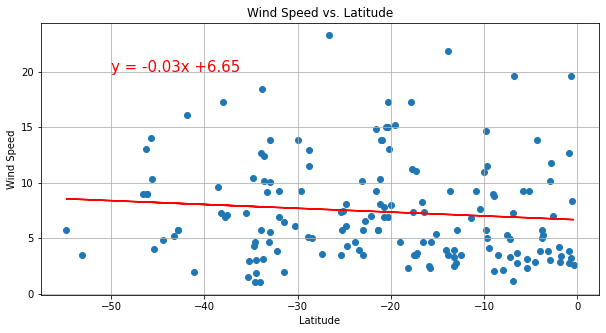

In [32]:
x_values = south_hemisphere_data['Lat']
y_values = south_hemisphere_data[column]

correlation = st.pearsonr(x_values,y_values)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

## Get the line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

## Add properties to the plot
plt.figure(figsize=(10,5))
plt.xlabel('Latitude')
plt.ylabel(column)
plt.title(f"{column} vs. Latitude")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.grid()

## Create the Scatter plot and linear
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

## Print the calcuations
print("----------------------------------------------------------------------")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(line_eq)
print(f"The r-value is: {rvalue**2}")
print("----------------------------------------------------------------------")

plt.savefig("Images/sh_lat_vs_wind.png", bbox_inches = "tight")
## Show plot
plt.show()

* There is no correlation between Wind speed and latitude in the other hemisphere